In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
# Load the dataset
file_path = 'websummit_startups_2024.csv'
startups_data = pd.read_csv(file_path)


In [40]:
# Display the first few rows of the dataset to understand its structure
def display_data_overview():
    print(startups_data.head())
    print(startups_data.describe(include='all'))

display_data_overview()

      Startup Name                                               Link  \
0             1Fit  https://websummit.com/appearances/lis24/8fbff6...   
1         4.events  https://websummit.com/appearances/lis24/c42ad2...   
2           506.ai  https://websummit.com/appearances/lis24/b1c446...   
3           Adrich  https://websummit.com/appearances/lis24/cdcef9...   
4  aikido security  https://websummit.com/appearances/lis24/8716ea...   

         Country                          Category  \
0     Kazakhstan             Healthtech & wellness   
1       Portugal  Advertising, content & marketing   
2        Austria             AI & machine learning   
3  United States             AI & machine learning   
4        Belgium                          Security   

                                        Social Links  \
0  {'linkedin': 'https://www.linkedin.com/company...   
1  {'linkedin': 'https://www.linkedin.com/showcas...   
2  {'linkedin': 'https://www.linkedin.com/company...   
3  {'linkedi

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\1987434215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


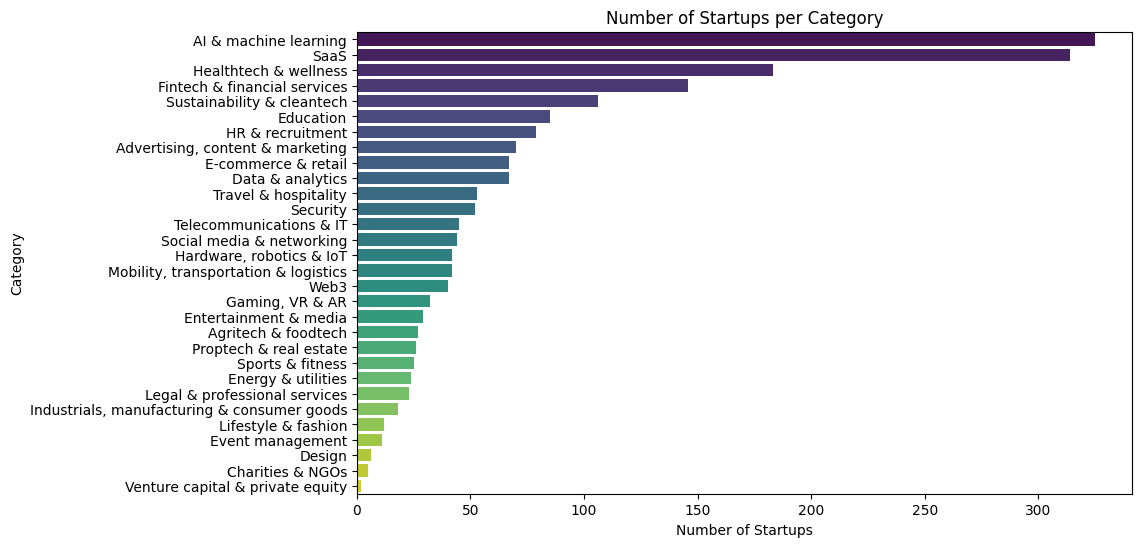

In [16]:
# 1. Count the number of startups per category
def plot_startups_per_category():
    category_counts = startups_data['Category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
    plt.title('Number of Startups per Category')
    plt.xlabel('Number of Startups')
    plt.ylabel('Category')
    plt.show()

plot_startups_per_category()

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\717820218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


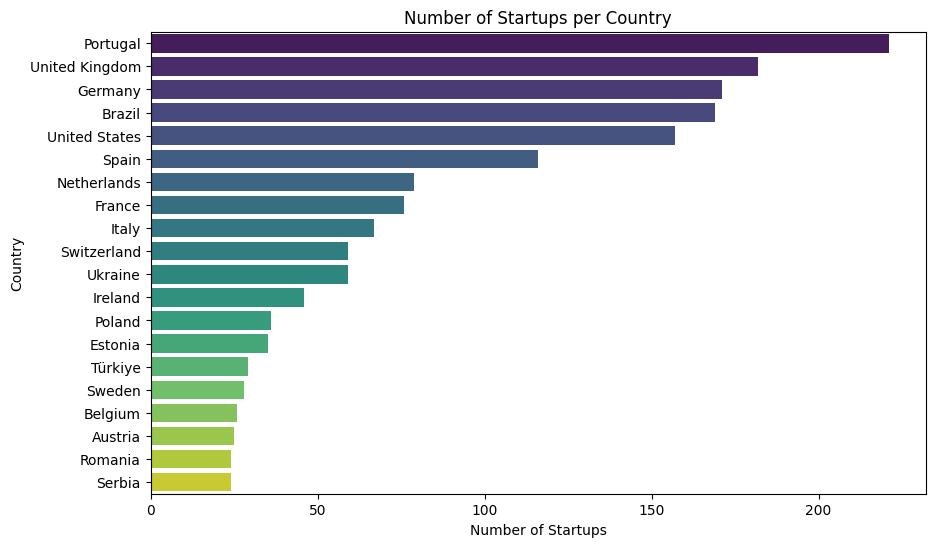

In [22]:
# 2. Count the number of startups per country
def plot_startups_per_country():
    country_counts = startups_data['Country'].value_counts().head(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
    plt.title('Number of Startups per Country')
    plt.xlabel('Number of Startups')
    plt.ylabel('Country')
    plt.show()

plot_startups_per_country()

          Word  Frequency
0           ai        740
11    platform        388
5         data        225
12     powered        181
6      digital        160
18        time        140
13        real        136
10  management        130
17   solutions        125
7       driven        111
3     business        101
9     insights         95
1          app         90
2        based         84
16    solution         83
15    software         80
14        saas         76
8       health         74
4   businesses         71
19       using         71


C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\2228235848.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_words['Frequency'], y=common_words['Word'], palette='viridis')


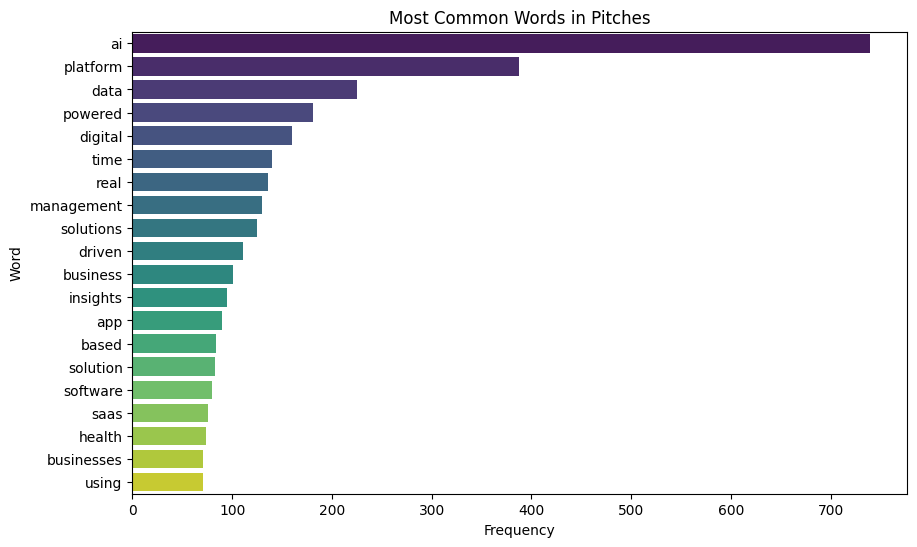

In [19]:
# 3. Analyze the pitches to find recurring themes or keywords
def plot_common_words_in_pitches():
    clean_pitches = startups_data['Pitch'].dropna()
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    word_counts = vectorizer.fit_transform(clean_pitches)
    common_words = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': word_counts.toarray().sum(axis=0)
    }).sort_values(by='Frequency', ascending=False)
    print(common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=common_words['Frequency'], y=common_words['Word'], palette='viridis')
    plt.title('Most Common Words in Pitches')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_common_words_in_pitches()

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\2800060047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=swiss_categories.values, y=swiss_categories.index, palette='viridis')


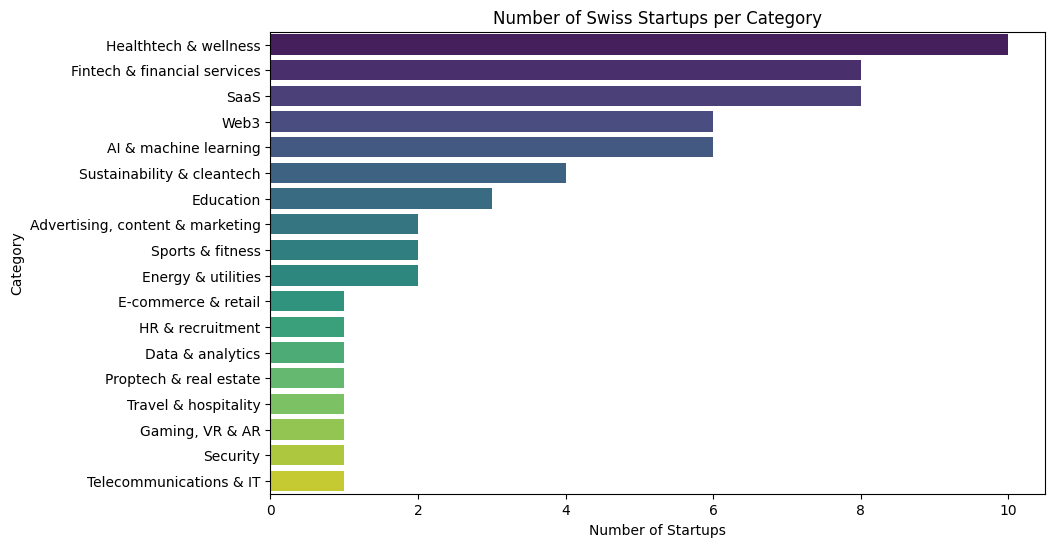

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\2800060047.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=swiss_common_words['Frequency'], y=swiss_common_words['Word'], palette='viridis')


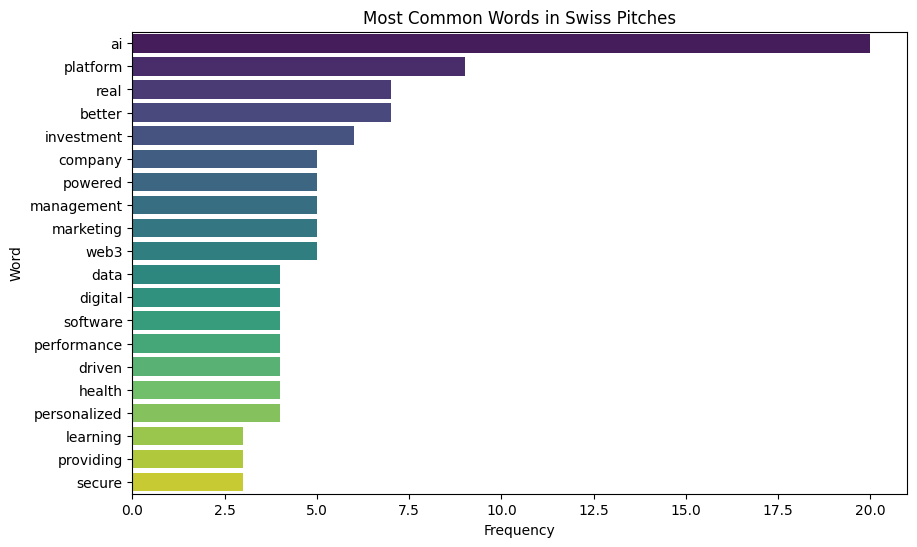

In [20]:
   # 4. Focused analysis on Swiss startups
def plot_swiss_startups_analysis():
    swiss_startups = startups_data[startups_data['Country'] == 'Switzerland']
    swiss_categories = swiss_startups['Category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=swiss_categories.values, y=swiss_categories.index, palette='viridis')
    plt.title('Number of Swiss Startups per Category')
    plt.xlabel('Number of Startups')
    plt.ylabel('Category')
    plt.show()
    swiss_pitches = swiss_startups['Pitch'].dropna()
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    swiss_word_counts = vectorizer.fit_transform(swiss_pitches)
    swiss_common_words = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': swiss_word_counts.toarray().sum(axis=0)
    }).sort_values(by='Frequency', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=swiss_common_words['Frequency'], y=swiss_common_words['Word'], palette='viridis')
    plt.title('Most Common Words in Swiss Pitches')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_swiss_startups_analysis()


C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\2033319066.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=portuguese_common_words['Frequency'], y=portuguese_common_words['Word'], palette='viridis')


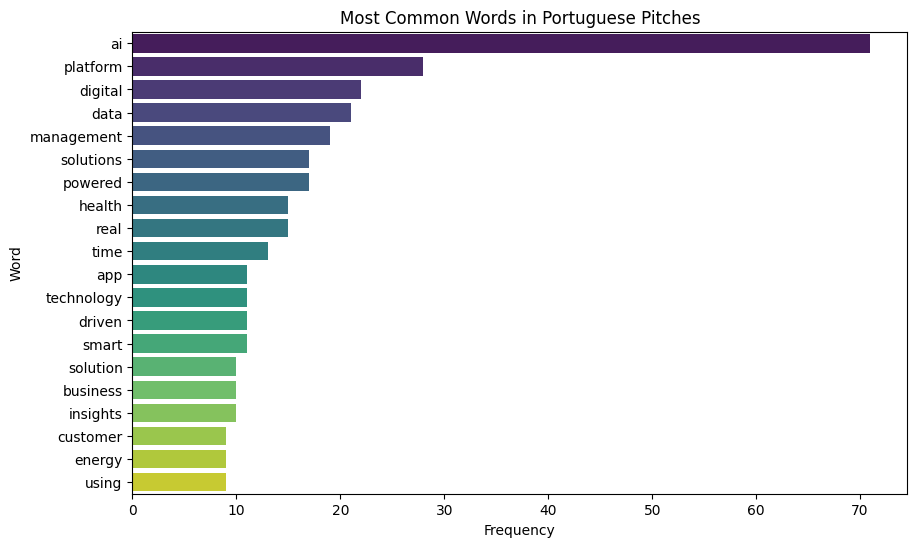

In [23]:
# 5. Focused analysis on Portuguese startups
def plot_portuguese_startups_analysis():
    portuguese_startups = startups_data[startups_data['Country'] == 'Portugal']
    portuguese_pitches = portuguese_startups['Pitch'].dropna()
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    portuguese_word_counts = vectorizer.fit_transform(portuguese_pitches)
    portuguese_common_words = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': portuguese_word_counts.toarray().sum(axis=0)
    }).sort_values(by='Frequency', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=portuguese_common_words['Frequency'], y=portuguese_common_words['Word'], palette='viridis')
    plt.title('Most Common Words in Portuguese Pitches')
    plt.xlabel('Frequency')
    
    plt.ylabel('Word')
    plt.show()

plot_portuguese_startups_analysis()

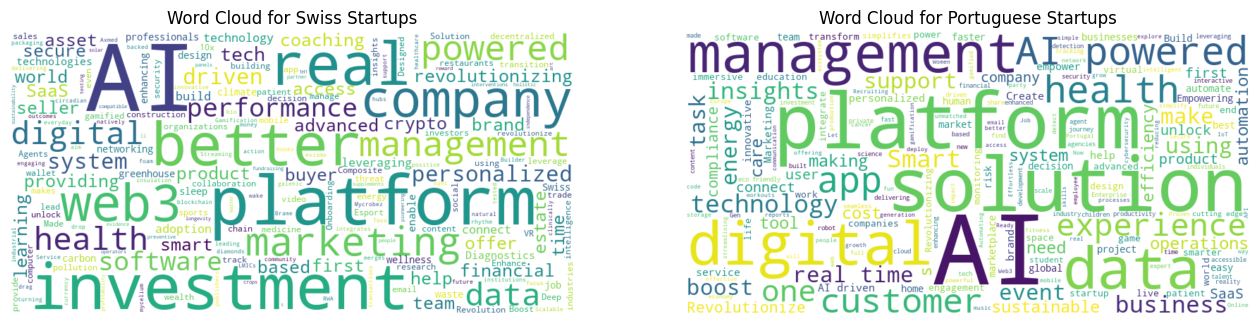

In [25]:
# 6. Word cloud comparison between Swiss and Portuguese startups
def plot_wordcloud_comparison():
    swiss_startups = startups_data[startups_data['Country'] == 'Switzerland']
    portuguese_startups = startups_data[startups_data['Country'] == 'Portugal']
    swiss_pitches = swiss_startups['Pitch'].dropna()
    portuguese_pitches = portuguese_startups['Pitch'].dropna()
    swiss_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(swiss_pitches))
    portuguese_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(portuguese_pitches))
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(swiss_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Swiss Startups')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(portuguese_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Portuguese Startups')
    plt.axis('off')
    plt.show()

plot_wordcloud_comparison()

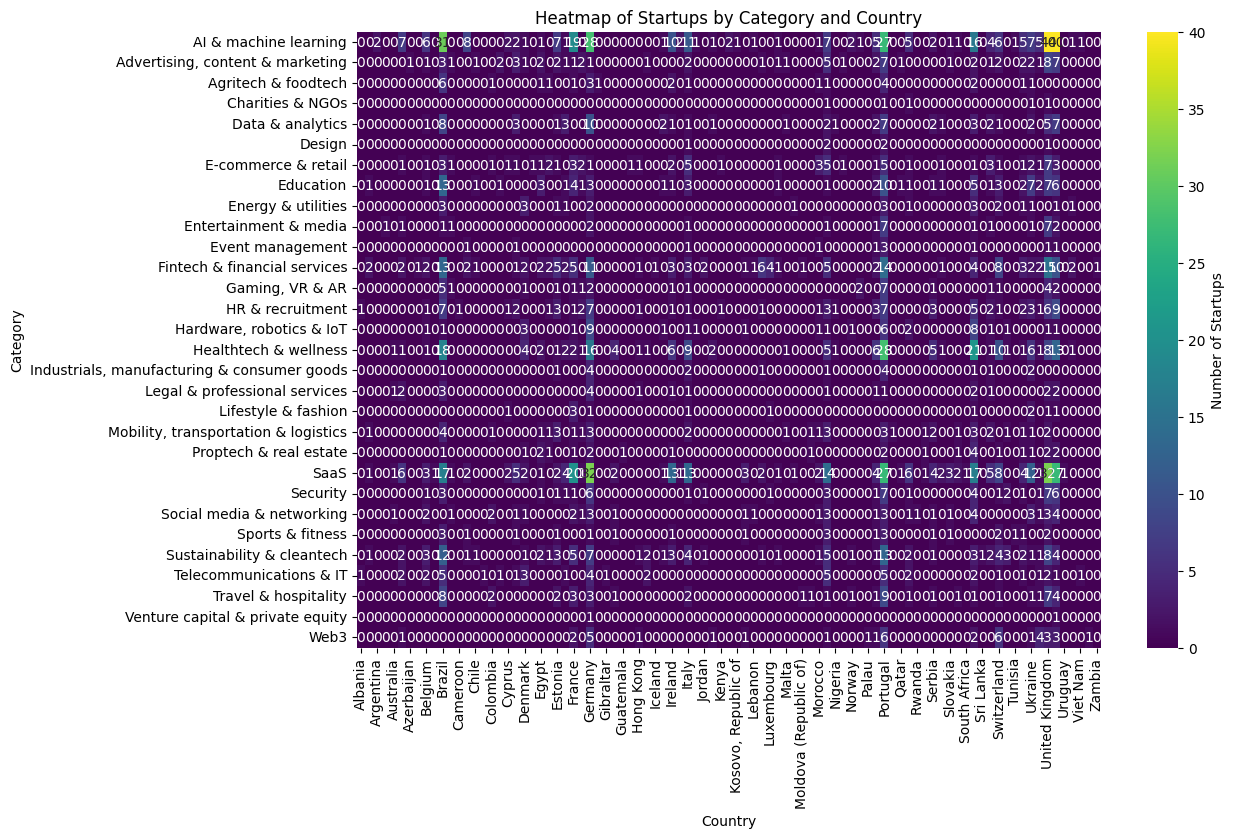

In [28]:
# 7. Heatmap of startups by category and country
def plot_heatmap_category_country():
    category_country_pivot = startups_data.pivot_table(index='Category', columns='Country', aggfunc='size', fill_value=0)
    plt.figure(figsize=(12, 8))
    sns.heatmap(category_country_pivot, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Startups'})
    plt.title('Heatmap of Startups by Category and Country')
    plt.xlabel('Country')
    plt.ylabel('Category')
    plt.show()

plot_heatmap_category_country()

<Figure size 1200x800 with 0 Axes>

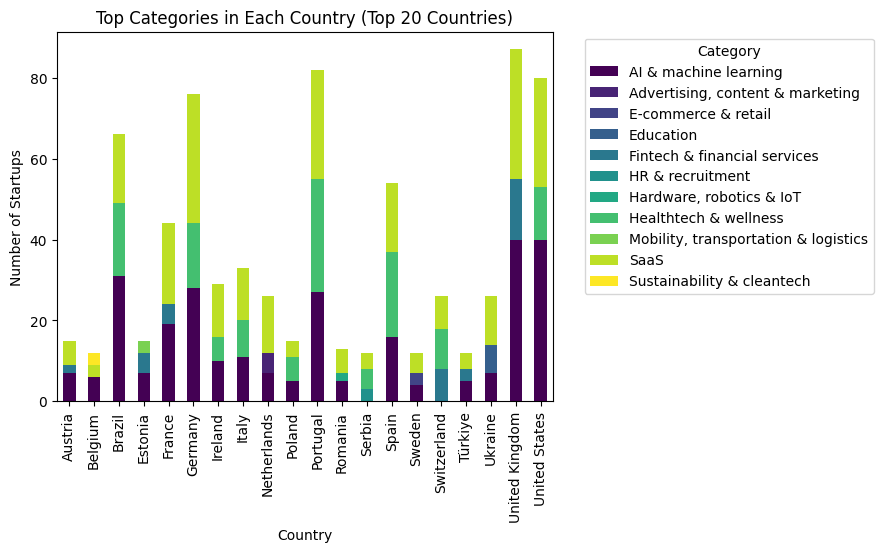

In [34]:
# 8. Top categories in each country (top 20 countries)
def plot_top_categories_per_country():
    top_countries = startups_data['Country'].value_counts().head(20).index
    filtered_data = startups_data[startups_data['Country'].isin(top_countries)]
    top_categories_per_country = filtered_data.groupby('Country')['Category'].apply(lambda x: x.value_counts().head(3))
    plt.figure(figsize=(12, 8))
    top_categories_per_country.unstack().plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Top Categories in Each Country (Top 20 Countries)')
    plt.xlabel('Country')
    plt.ylabel('Number of Startups')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
plot_top_categories_per_country()

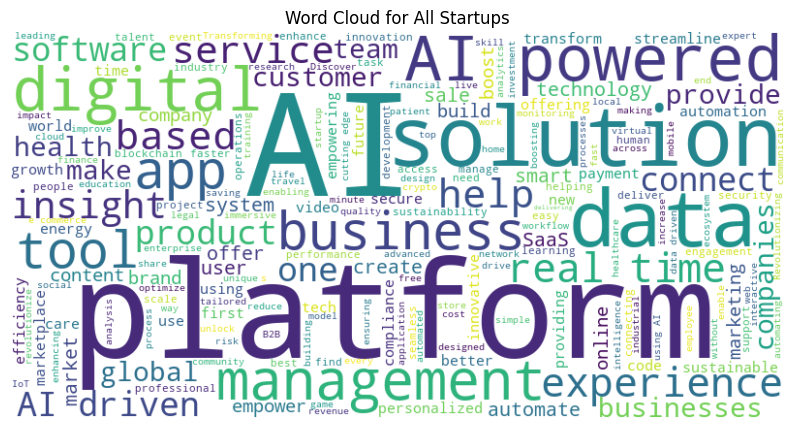

In [35]:
# 9. Word cloud for all startups
def plot_wordcloud_all_startups():
    clean_pitches = startups_data['Pitch'].dropna()
    all_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(clean_pitches))
    plt.figure(figsize=(10, 6))
    plt.imshow(all_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for All Startups')
    plt.axis('off')
    plt.show()

plot_wordcloud_all_startups()

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\2950784876.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collaboration_potential.values, y=collaboration_potential.index, palette='viridis')


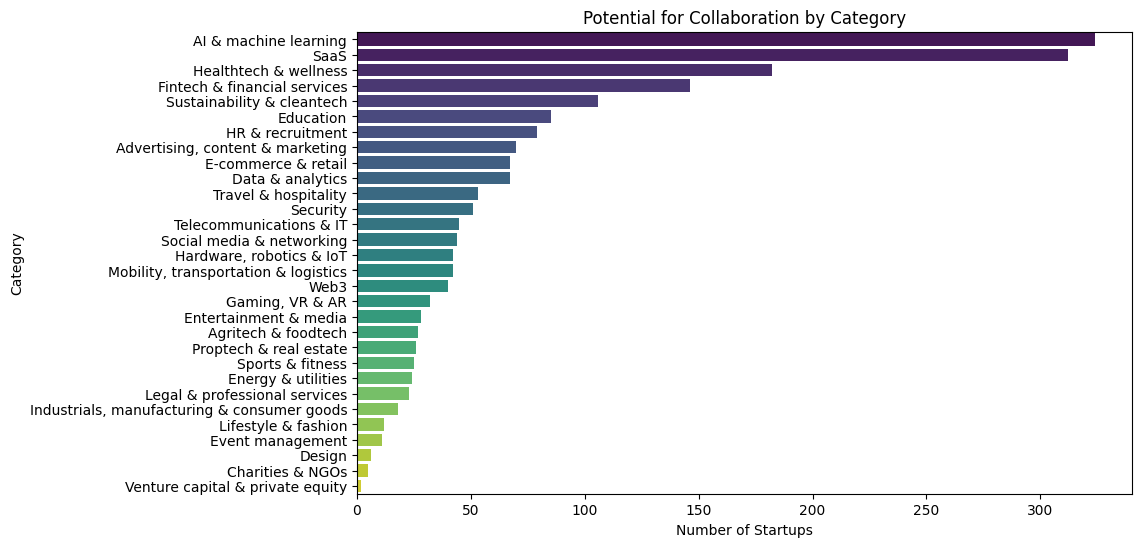

In [36]:
# 10. Potential collaborations
def plot_potential_collaborations():
    collaboration_potential = startups_data.pivot_table(index='Category', columns='Country', aggfunc='size', fill_value=0).sum(axis=1).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=collaboration_potential.values, y=collaboration_potential.index, palette='viridis')
    plt.title('Potential for Collaboration by Category')
    plt.xlabel('Number of Startups')
    plt.ylabel('Category')
    plt.show()

plot_potential_collaborations()

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\3034581134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emerging_categories.values, y=emerging_categories.index, palette='viridis')


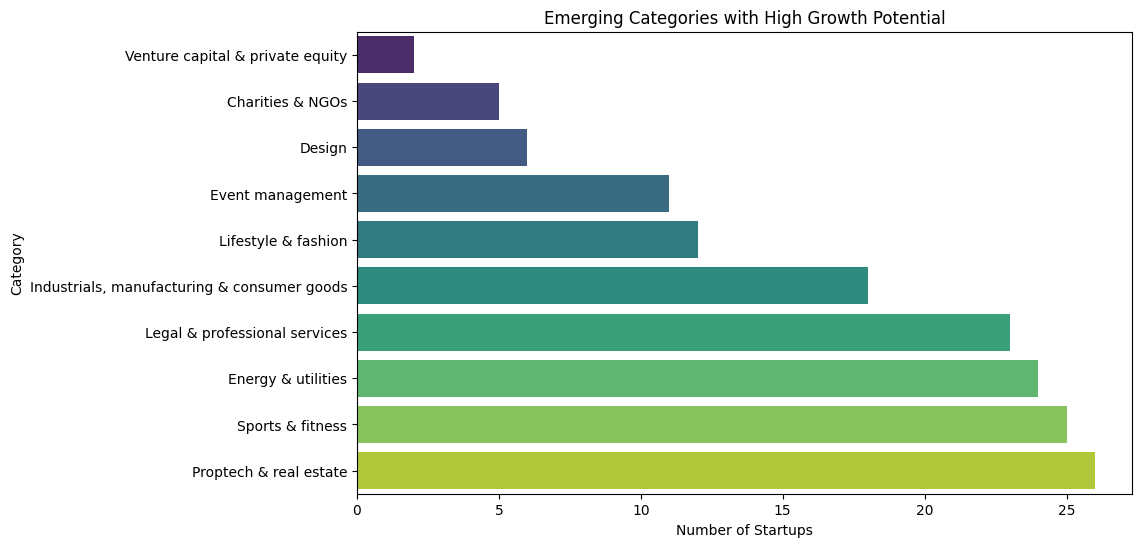

In [37]:
# 11. Emerging categories
def plot_emerging_categories():
    emerging_categories = startups_data.pivot_table(index='Category', columns='Country', aggfunc='size', fill_value=0).sum(axis=1).sort_values().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=emerging_categories.values, y=emerging_categories.index, palette='viridis')
    plt.title('Emerging Categories with High Growth Potential')
    plt.xlabel('Number of Startups')
    plt.ylabel('Category')
    plt.show()

plot_emerging_categories()

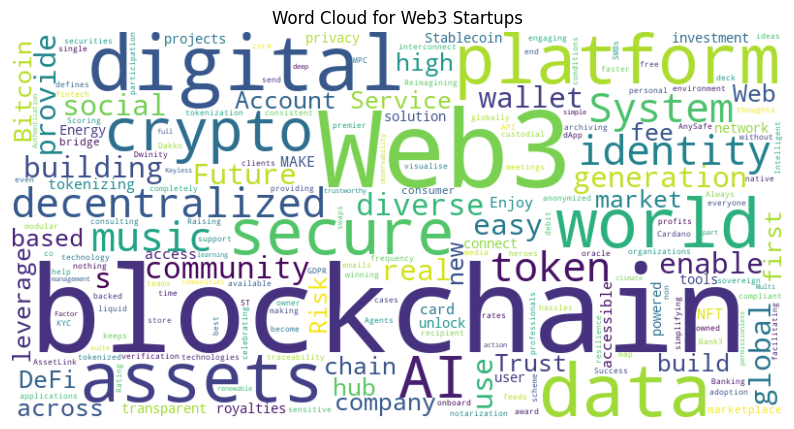

In [38]:
# 12. Focus on Web3 startups
def plot_web3_startups_analysis():
    web3_startups = startups_data[startups_data['Category'].str.contains('Web3', case=False, na=False)]
    web3_pitches = web3_startups['Pitch'].dropna()
    web3_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(web3_pitches))
    plt.figure(figsize=(10, 6))
    plt.imshow(web3_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Web3 Startups')
    plt.axis('off')
    plt.show()

plot_web3_startups_analysis()

C:\Users\Terence Laurent\AppData\Local\Temp\ipykernel_15516\946604433.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_words['Frequency'], y=common_words['Word'], palette='viridis')


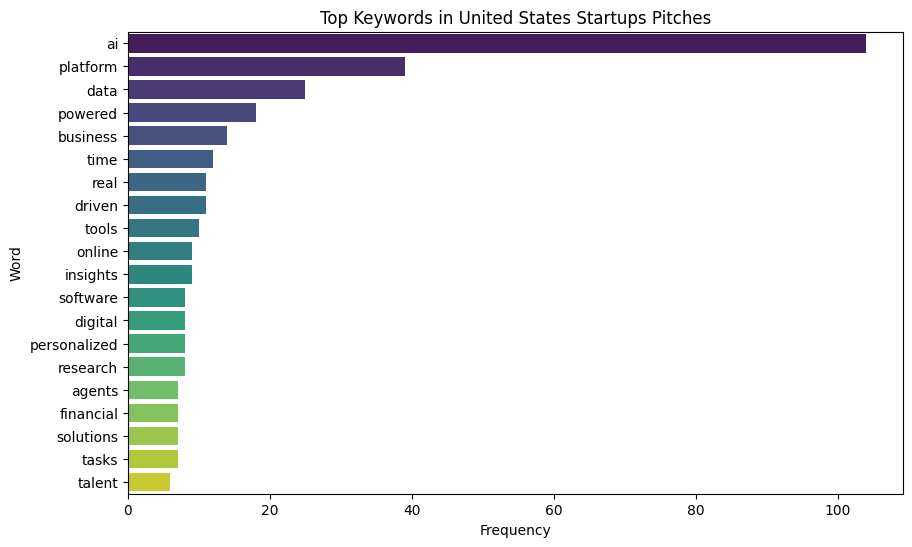

In [44]:
def plot_top_keywords_by_region(country_name):
    country_pitches = startups_data[startups_data['Country'] == country_name]['Pitch'].dropna()
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    word_counts = vectorizer.fit_transform(country_pitches)
    common_words = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': word_counts.toarray().sum(axis=0)
    }).sort_values(by='Frequency', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=common_words['Frequency'], y=common_words['Word'], palette='viridis')
    plt.title(f'Top Keywords in {country_name} Startups Pitches')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_top_keywords_by_region('United States')

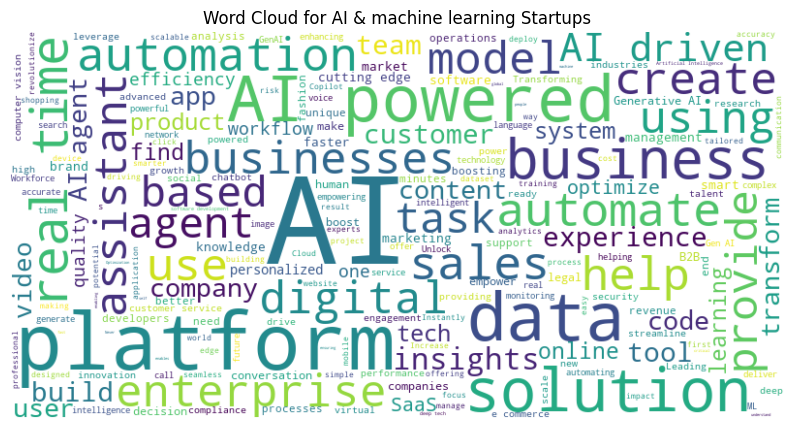

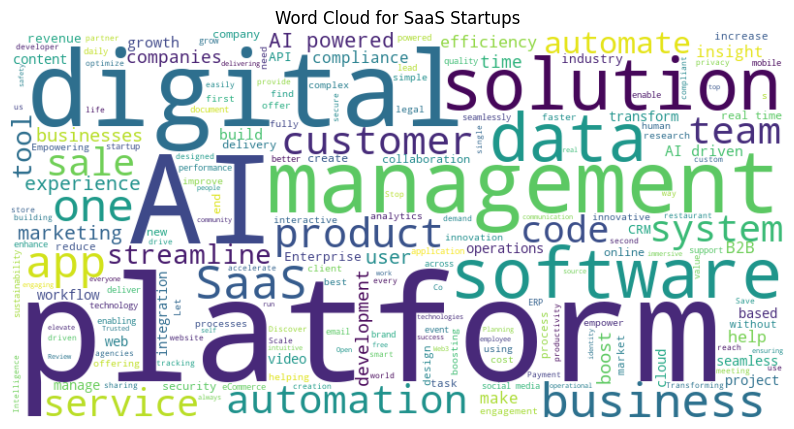

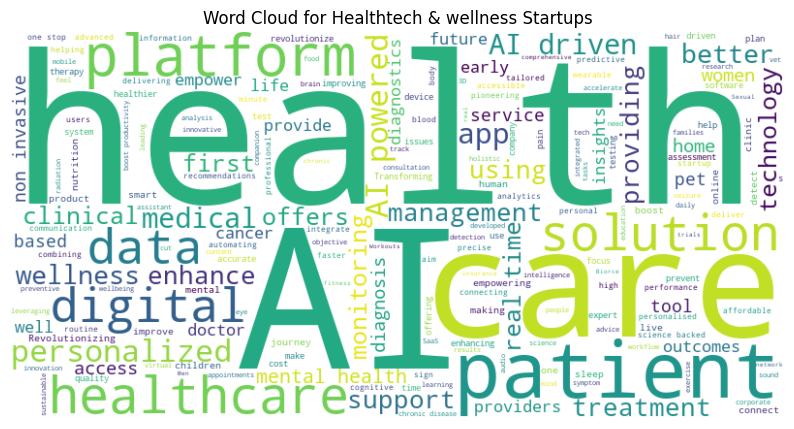

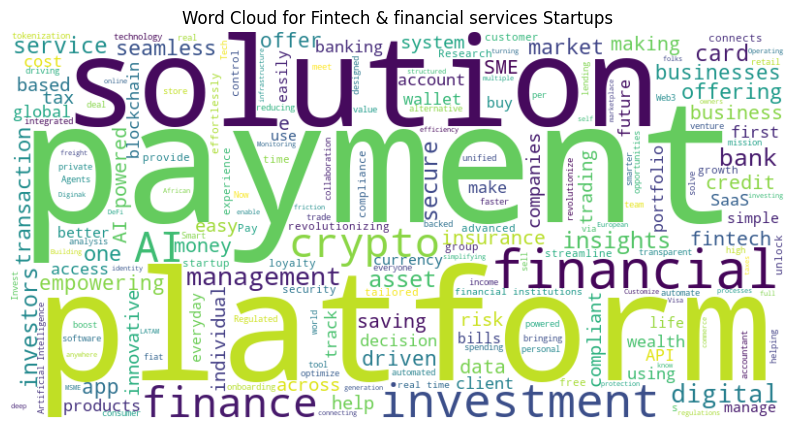

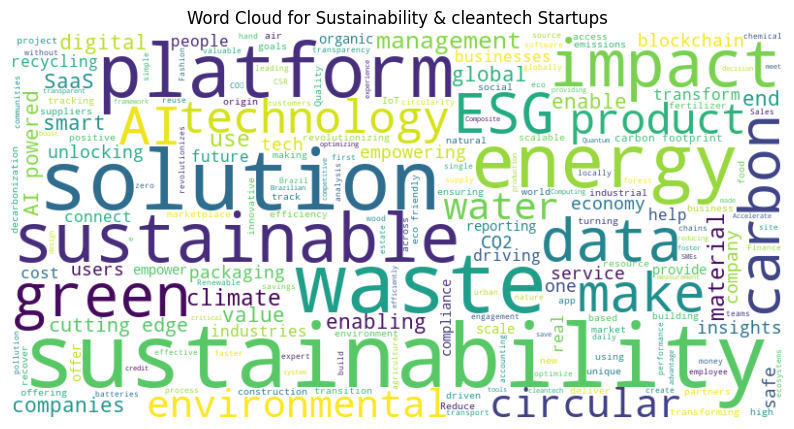

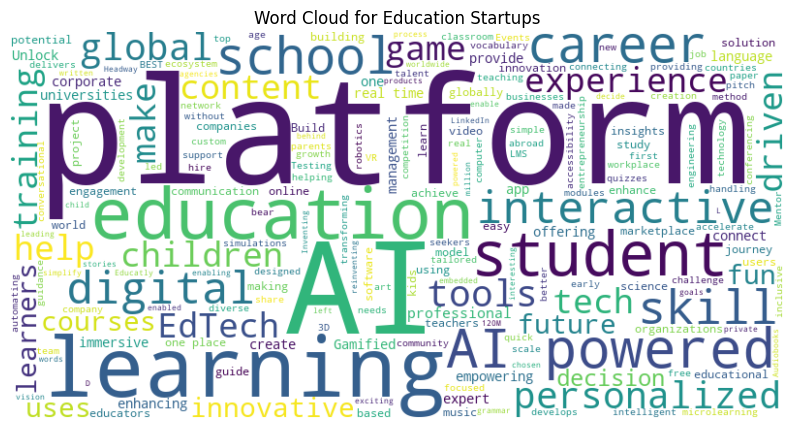

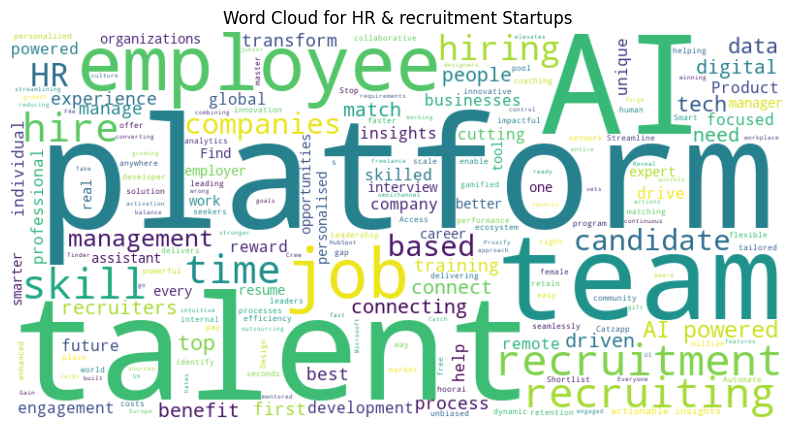

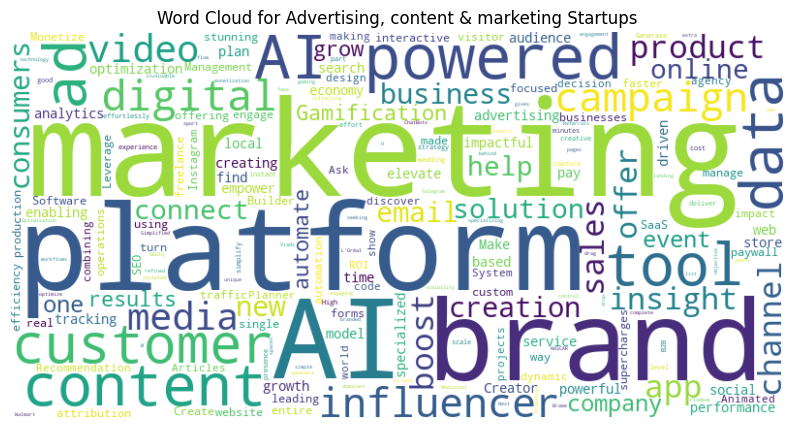

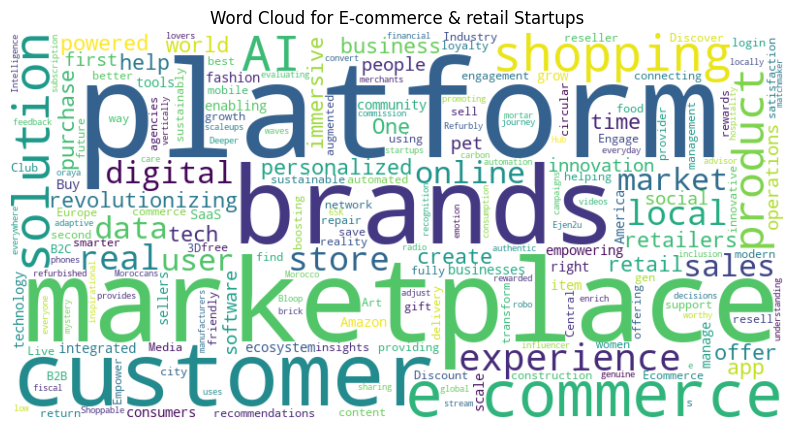

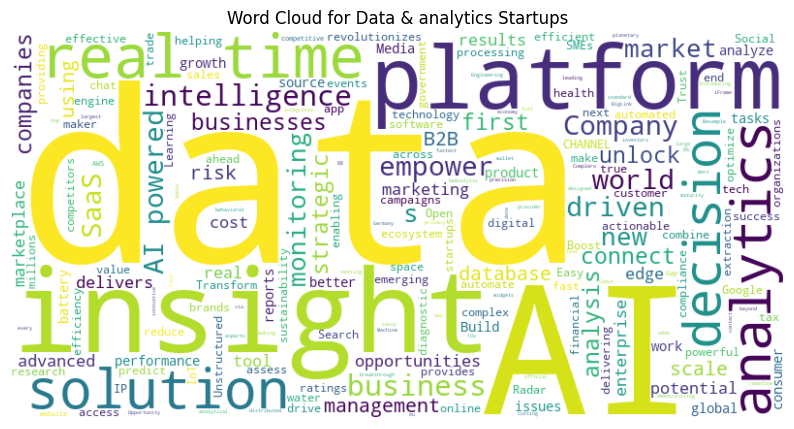

In [46]:
# 14. Word clouds for the top 10 most common categories
def plot_wordclouds_top_categories():
    top_categories = startups_data['Category'].value_counts().head(10).index
    for category in top_categories:
        category_startups = startups_data[startups_data['Category'] == category]
        category_pitches = category_startups['Pitch'].dropna()
        category_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(category_pitches))
        plt.figure(figsize=(10, 6))
        plt.imshow(category_wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {category} Startups')
        plt.axis('off')
        plt.show()

plot_wordclouds_top_categories()